In [1]:
from models.densitysplit_ccf import DensitySplitCCF
import numpy as np

xi_r_filename_i = 'example_data/Galaxies_HOD_z0.57_Real_den1.tpcf'
xi_r_filename_j = 'example_data/Galaxies_HOD_z0.57_Real_den5.tpcf'
xi_r_filename = f'{xi_r_filename_i}

sv_rmu_filename_i = 'example_data/Galaxies_HOD_z0.57_Real_den1.std_los_velocity_vs_rmu'
sv_rmu_filename_j = 'example_data/Galaxies_HOD_z0.57_Real_den5.std_los_velocity_vs_rmu'
sv_rmu_filename = f'{sv_rmu_filename_i}''

smin = '0'
smax = '150'

ds = DensitySplitCCF(
    xi_r_filename=xi_r_filename,
    sv_rmu_filename=sv_rmu_filename,
    smin=smin,
    smax=smax)

Setting up RSD model for cross-correlation function.
Fitting 2 density quantiles.
fs8 = 0.47272825720543027
bs8 = 1.2880978817158586
s8_zeff = 0.622269508075294
Using empirical density-velocity coupling.


In [2]:
s = np.linspace(0, 150, 100)
mu = np.linspace(-1, 1, 100)

theory_xi = ds.theory_xi_smu(
    fs8=ds.fs8,
    bs8=ds.bs8,
    sigma_v=360,
    q_perp=1.0,
    q_para=1.0,
    s=s,
    mu=mu,
    denbin='den0',
    nu=0)

print(theory_xi[:,:].min())

-0.9561837521335617


In [3]:
from utilities.utilities import get_multipoles

theory_xi0, theory_xi2 = get_multipoles([0, 2], s, mu,
                                       theory_xi)

theory_xi0

array([-9.67569761e-01, -9.43781406e-01, -9.39433883e-01, -9.46607888e-01,
       -9.57384120e-01, -9.63843275e-01, -9.58066050e-01, -9.32133142e-01,
       -8.78615400e-01, -7.92044278e-01, -6.78078039e-01, -5.74497322e-01,
       -4.88022382e-01, -4.14949209e-01, -3.52062549e-01, -2.98102160e-01,
       -2.52296552e-01, -2.13874234e-01, -1.82063717e-01, -1.56093511e-01,
       -1.35192127e-01, -1.18588073e-01, -1.05509861e-01, -9.51860010e-02,
       -8.68450025e-02, -7.97153759e-02, -7.31516373e-02, -6.70123266e-02,
       -6.12819895e-02, -5.59451719e-02, -5.09864195e-02, -4.63902782e-02,
       -4.21412937e-02, -3.82240118e-02, -3.46229783e-02, -3.13227390e-02,
       -2.83078398e-02, -2.55628263e-02, -2.30722444e-02, -2.08206399e-02,
       -1.87925585e-02, -1.69725461e-02, -1.53451485e-02, -1.38949114e-02,
       -1.26063806e-02, -1.14641020e-02, -1.04526213e-02, -9.55648428e-03,
       -8.76023679e-03, -8.04842460e-03, -7.40559350e-03, -6.81847587e-03,
       -6.28255044e-03, -

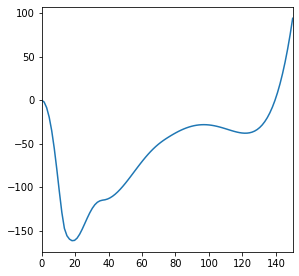

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(4.5, 4.5))

ax.plot(s, s**2*theory_xi0)

ax.set_xlim(0, 150)
plt.show()